Accuracy: 0.9786
Confusion Matrix:
[[616   9   0]
 [  0 619   0]
 [  0  31 592]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       625
           1       0.94      1.00      0.97       619
           2       1.00      0.95      0.97       623

    accuracy                           0.98      1867
   macro avg       0.98      0.98      0.98      1867
weighted avg       0.98      0.98      0.98      1867



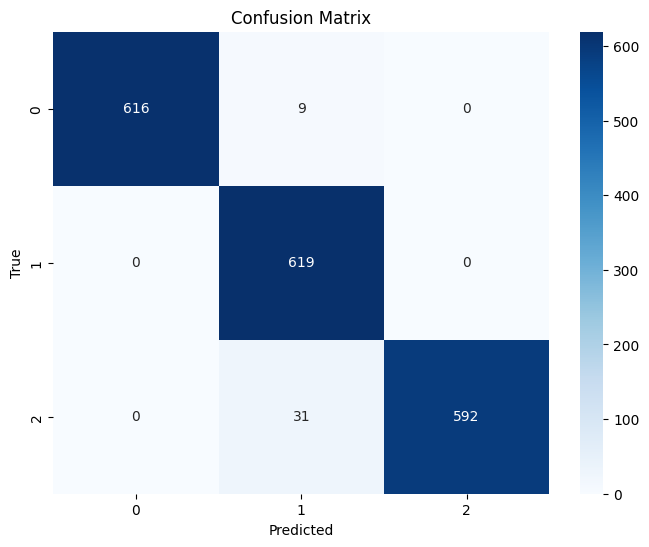

In [12]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    
    class_report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(class_report)
    
    return y_pred, conf_matrix, class_report

def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

if __name__ == "__main__":
    X_test = pd.read_csv('data/processed/X_test.csv')
    y_test = pd.read_csv('data/processed/y_test.csv')

    # Ensure y_test is categorical
    if y_test['Value'].dtype == 'float64' or y_test['Value'].dtype == 'int64':
        y_test['Value'] = pd.qcut(y_test['Value'], q=3, labels=[0, 1, 2])

    # Load the trained model from the uploaded file
    model_path = 'F:/HealthMate AI_Project/notebooks/models/random_forest.joblib'
    model = joblib.load(model_path)
    
    y_pred, conf_matrix, class_report = evaluate_model(model, X_test, y_test)
    plot_confusion_matrix(conf_matrix)
